In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data_split4/train/',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 11149 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data_split4/test/',
                                            target_size = (64, 64))

Found 1351 images belonging to 15 classes.


In [ ]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=32,epochs=50,callbacks=[history])

Epoch 1/50
349/349 [==============================] - 4340s 12s/step - loss: 2.5228 - accuracy: 0.1761 - val_loss: 2.5442 - val_accuracy: 0.1962
Epoch 2/50
349/349 [==============================] - 98s 280ms/step - loss: 2.4388 - accuracy: 0.2266 - val_loss: 2.4116 - val_accuracy: 0.2879
Epoch 3/50
349/349 [==============================] - 97s 277ms/step - loss: 2.3292 - accuracy: 0.2724 - val_loss: 2.3436 - val_accuracy: 0.2805
Epoch 4/50
349/349 [==============================] - 97s 277ms/step - loss: 2.2614 - accuracy: 0.2979 - val_loss: 2.3135 - val_accuracy: 0.2820
Epoch 5/50
349/349 [==============================] - 97s 277ms/step - loss: 2.1967 - accuracy: 0.3172 - val_loss: 2.3031 - val_accuracy: 0.2887
Epoch 6/50
349/349 [==============================] - 97s 278ms/step - loss: 2.1719 - accuracy: 0.3213 - val_loss: 2.2531 - val_accuracy: 0.3227
Epoch 7/50
349/349 [==============================] - 96s 276ms/step - loss: 2.1283 - accuracy: 0.3330 - val_loss: 2.1730 - val_ac

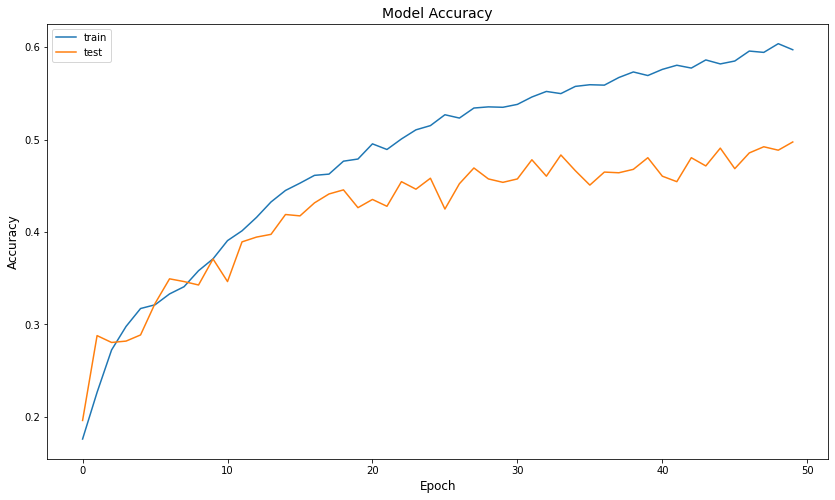

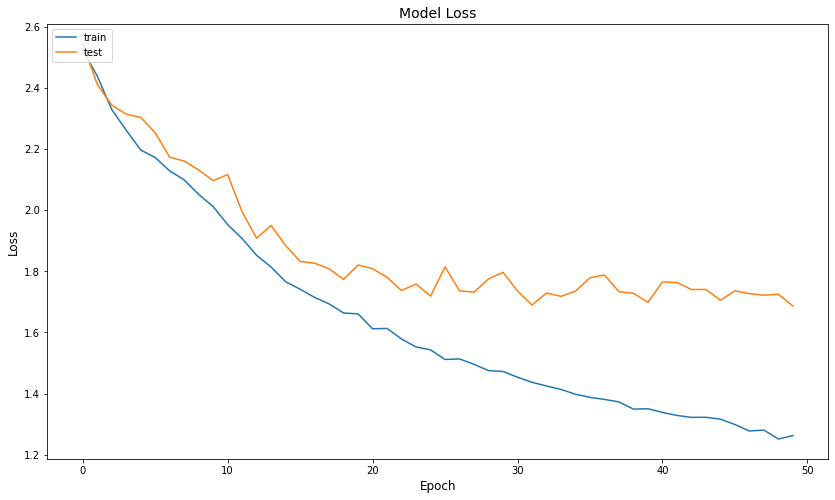

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()